/Users/tiagonunes/computer-vision/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Labels: ['cats', 'dogs']
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 50, 50, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 50, 50, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 50, 50, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 50, 50, 32)        288       
 )                                                               
       

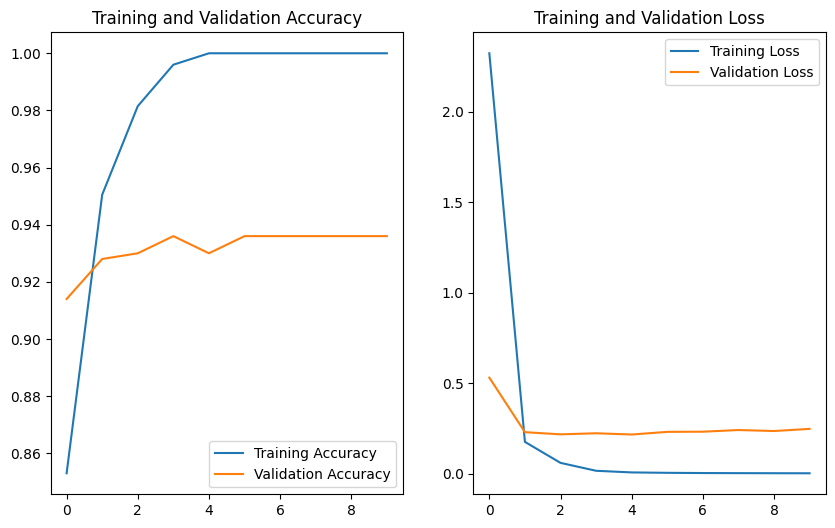

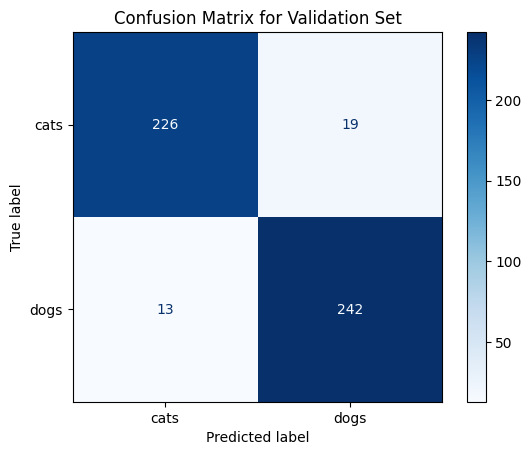

10/10 [==============================] - 1s 58ms/step


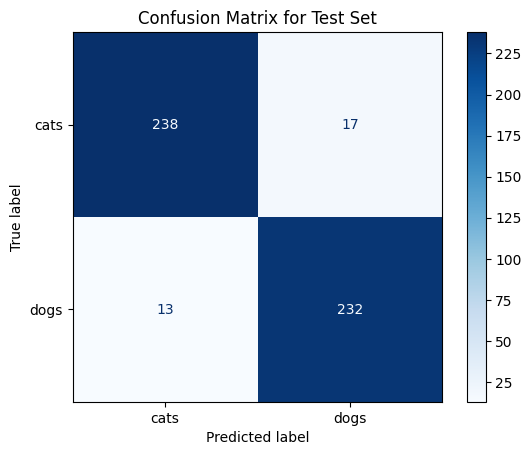

Melhor taxa de acertos (conjunto de validação): 93.60%
Média taxa de acertos (conjunto de validação): 93.18%


In [1]:
import keras.applications
from numpy import mean
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sys
import tensorflow as tf
from keras import layers
from keras.applications import MobileNet
import logging, os

logging.disable(logging.WARNING)
logging.disable(logging.INFO)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# Definir a seed, para os resultados serem consistentes
tf.keras.utils.set_random_seed(7)

path = input("Enter the path to the images directory: ")

train_path = os.path.join(path, "train")
validation_path = os.path.join(path, "validation")

if not os.path.isdir(path) or not os.path.isdir(train_path) or not os.path.isdir(validation_path):
    sys.exit(f"The directory doesn't exist or it doesn't have the expected structure: {path}.\n"
             f"Please take a look at the instructions comments at the top of the script.")

BATCH_SIZE = 50
IMG_HEIGHT = 100
IMG_WIDTH = 100
EPOCHS = 10

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_and_val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    color_mode='rgb',
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_ds, test_ds = tf.keras.utils.split_dataset(
    test_and_val_ds, left_size=.5, right_size=.5, shuffle=True
)

# labels inferidas a partir dos nomes dos diretorios
labels = train_ds.class_names
n_labels = len(labels)
print(f"Labels: {labels}")

# Importar o modelo. include_top=False significa que não se pretendem incluir as camadas densas originais do modelo
mobileNetModel = MobileNet(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False)
mobileNetModel.summary()
# Importante! Assinalar que não se pretende treinar os pesos do modelo importado
mobileNetModel.trainable = False

model = tf.keras.models.Sequential([
    layers.Rescaling(1. / 255, offset=-1, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    mobileNetModel,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_labels, activation="softmax")
])

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

# evolucao da loss e acertos
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# matriz de confusao para os dados de validação
y_pred_val = model.predict(val_ds)
y_pred_val = tf.argmax(y_pred_val, axis=1)
y_true_val = tf.concat([y for x, y in val_ds], axis=0)
y_true_val = tf.argmax(y_true_val, axis=1)
cm_val = confusion_matrix(y_true_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Validation Set')
plt.show()

# matriz de confusao para os dados de teste
y_pred_test = model.predict(test_ds)
y_pred_test = tf.argmax(y_pred_test, axis=1)
y_true_test = tf.concat([y for x, y in test_ds], axis=0)
y_true_test = tf.argmax(y_true_test, axis=1)
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

# Dar print da melhor accuracy para os dados de teste
best_val_accuracy = max(history.history['val_accuracy'])
mean_val_accuracy = mean(history.history['val_accuracy'])
print(f"Melhor taxa de acertos (conjunto de validação): {(best_val_accuracy * 100):.2f}%")
print(f"Média taxa de acertos (conjunto de validação): {(mean_val_accuracy * 100):.2f}%")




87910968/87910968 [==============================] - 4s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 50, 50, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 50, 50, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 50, 50, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 50, 50, 32)        288       
 )                                                               
                                                 

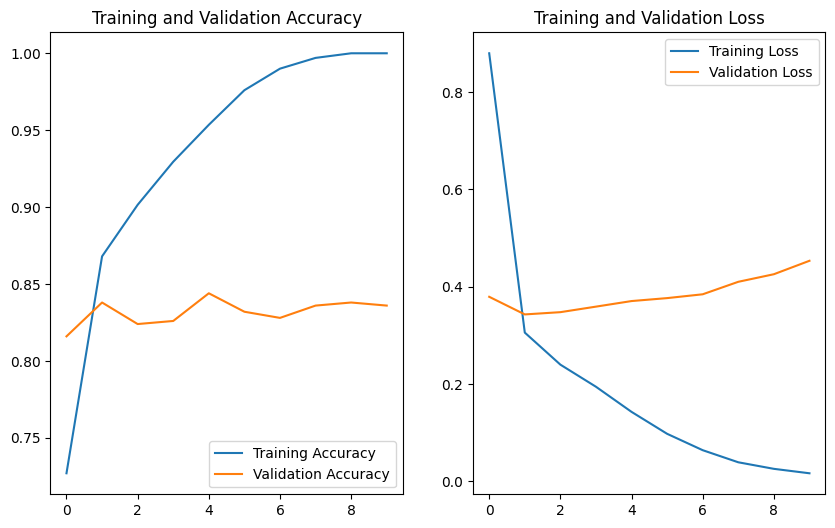

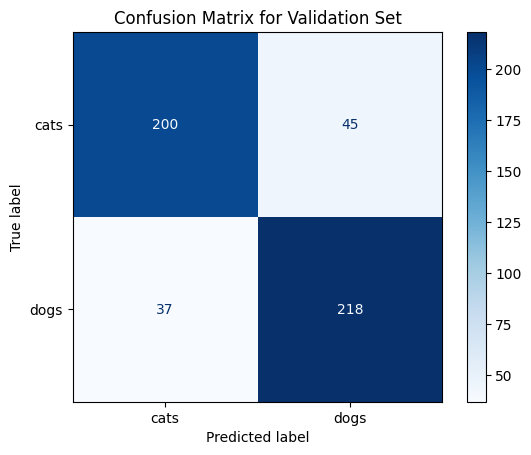

10/10 [==============================] - 1s 101ms/step


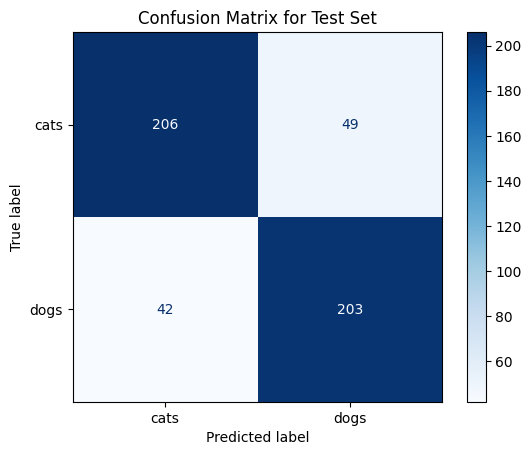

Melhor taxa de acertos (conjunto de validação): 84.40%
Média taxa de acertos (conjunto de validação): 83.18%


In [2]:
from keras.src.applications import InceptionV3

inceptionV3 = InceptionV3(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False)
mobileNetModel.summary()
# Importante! Assinalar que não se pretende treinar os pesos do modelo importado
inceptionV3.trainable = False

model = tf.keras.models.Sequential([
    layers.Rescaling(1. / 255, offset=-1, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    inceptionV3,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_labels, activation="softmax")
])

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

# evolucao da loss e acertos
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# matriz de confusao para os dados de validação
y_pred_val = model.predict(val_ds)
y_pred_val = tf.argmax(y_pred_val, axis=1)
y_true_val = tf.concat([y for x, y in val_ds], axis=0)
y_true_val = tf.argmax(y_true_val, axis=1)
cm_val = confusion_matrix(y_true_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Validation Set')
plt.show()

# matriz de confusao para os dados de teste
y_pred_test = model.predict(test_ds)
y_pred_test = tf.argmax(y_pred_test, axis=1)
y_true_test = tf.concat([y for x, y in test_ds], axis=0)
y_true_test = tf.argmax(y_true_test, axis=1)
cm_test = confusion_matrix(y_true_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Test Set')
plt.show()

# Dar print da melhor accuracy para os dados de teste
best_val_accuracy = max(history.history['val_accuracy'])
mean_val_accuracy = mean(history.history['val_accuracy'])
print(f"Melhor taxa de acertos (conjunto de validação): {(best_val_accuracy * 100):.2f}%")
print(f"Média taxa de acertos (conjunto de validação): {(mean_val_accuracy * 100):.2f}%")